# Setup

In [44]:
import scanpy as sc
import scvi
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
sc.set_figure_params(figsize=(4,4),  dpi=150, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
os.getcwd()

'/notebook/Joe/M-cells/code'

# import data

In [4]:
adata = sc.read("/notebook/External/Archive/Joe/processed_data/M_cell/h5ad_files/post_Aire_WT_3007_genes.h5ad")
model = scvi.model.SCVI.load("/notebook/External/Archive/Joe/processed_data/M_cell/scVI_models/combined_WT_3007_genes", adata=adata, use_gpu=True)

INFO     File /notebook/External/Archive/Joe/processed_data/M_cell/scVI_models/combined_WT_30
         07_genes/model.pt already downloaded                                                


In [5]:
adata.obs

,batch,scrublet_score,scrublet_called_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,_scvi_batch,_scvi_labels,leiden_scVI,cell_type,post_Aire_leiden_scVI
AAACCCAAGCCACCGT-1,Corey,0.061150,False,4330,22888.0,411.0,1.795701,4330,0,0,1,Late Aire,0
AAACCCACACGTAGAG-1,Corey,0.088096,False,4818,20949.0,1606.0,7.666237,4818,0,0,1,Late Aire,4
AAACCCACACTCCCTA-1,Corey,0.116656,False,2066,6615.0,80.0,1.209373,2066,0,0,2,Post Aire 2 (Tspan8),4
AAACCCACATTGACTG-1,Corey,0.077549,False,3973,12769.0,573.0,4.487431,3973,0,0,2,Post Aire 2 (Tspan8),5
AAACCCATCACCTTAT-1,Corey,0.066695,False,808,1775.0,171.0,9.633802,808,0,0,3,Post Aire 5_Late Aire 2?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAAGAGGCT-1,Yi,0.066695,False,2309,5806.0,211.0,3.634171,2309,1,0,2,Post Aire 2 (Tspan8),4
TTTGTTGCACGGGCTT-1,Yi,0.082583,False,4014,15497.0,219.0,1.413177,4014,1,0,2,Post Aire 2 (Tspan8),4
TTTGTTGCAGAACATA-1,Yi,0.070771,False,2388,8773.0,89.0,1.014476,2388,1,0,2,Post Aire 2 (Tspan8),5
TTTGTTGCAGTATGAA-1,Yi,0.094163,False,2455,7366.0,217.0,2.945968,2455,1,0,7,Post Aire 4 (Ascl1),7


In [6]:
de_df = model.differential_expression(
    groupby="cell_type",
)

DE...: 100%|██████████| 9/9 [00:09<00:00,  1.06s/it]


In [7]:
de_df

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Olfr214,0.9858,0.0142,4.240211,1.183886e-06,5.879633e-05,0.0,0.25,-5.779629,-6.707686,10.539667,...,0.004441,0.012735,0.000370,0.003041,0.013896,0.169163,True,Late Aire vs Rest,Late Aire,Rest
Scgb1b24,0.9850,0.0150,4.184591,6.578467e-09,4.747963e-07,0.0,0.25,-7.159801,-7.328280,6.989200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,Late Aire vs Rest,Late Aire,Rest
Olfr1286,0.9844,0.0156,4.144761,1.302213e-07,2.410086e-05,0.0,0.25,-5.413702,-5.725767,9.574802,...,0.000000,0.001331,0.000000,0.000950,0.000000,0.181134,True,Late Aire vs Rest,Late Aire,Rest
Six6,0.9828,0.0172,4.045496,2.108928e-05,2.109656e-06,0.0,0.25,3.983479,4.073460,8.703182,...,0.003701,0.000190,0.001850,0.000190,0.058276,0.002488,True,Late Aire vs Rest,Late Aire,Rest
Pramel7,0.9826,0.0174,4.033731,8.837372e-08,2.594228e-06,0.0,0.25,-6.729268,-7.234205,6.965332,...,0.000000,0.000190,0.000000,0.000190,0.000000,0.002569,True,Late Aire vs Rest,Late Aire,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tmsb4x,0.8366,0.1634,1.633145,2.760581e-02,4.590847e-02,0.0,0.25,-0.474673,-0.427609,1.159800,...,76.454552,72.091721,1.000000,0.981363,272.745880,569.733765,True,Post Aire 6 vs Rest,Post Aire 6,Rest
Cstb,0.8304,0.1696,1.588465,7.334851e-03,6.123421e-03,0.0,0.25,0.513139,0.489662,1.042105,...,28.045454,8.789026,1.000000,0.812618,77.199860,71.973366,True,Post Aire 6 vs Rest,Post Aire 6,Rest
Clu,0.8288,0.1712,1.577146,4.363920e-03,7.205559e-03,0.0,0.25,-0.497882,-0.402881,1.191253,...,2.954545,12.339544,0.590909,0.717920,12.514607,79.081490,True,Post Aire 6 vs Rest,Post Aire 6,Rest
AA467197,0.8106,0.1894,1.453913,1.951403e-03,2.277820e-03,0.0,0.25,-0.064656,-0.120457,1.193567,...,2.318182,3.137853,0.590909,0.509130,10.927483,20.892292,True,Post Aire 6 vs Rest,Post Aire 6,Rest


In [8]:
markers = {}
cats = adata.obs.cell_type.cat.categories
for i, c in enumerate(cats):
    print(f"Saving {c} DE genes")
    cid = f"{c} vs Rest"
    cell_type_df = de_df.loc[de_df.comparison == cid]
    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]
    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 2.5]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]
    markers[c] = cell_type_df
    cell_type_df.to_csv(f"/notebook/Joe/M-cells/analysis/DE_post_aire_cell_types/{c}_marker_genes.csv")

Saving Late Aire DE genes
Saving Post Aire 2 (Tspan8) DE genes
Saving Post Aire 5_Late Aire 2? DE genes
Saving Tuft DE genes
Saving Post Aire 4 (Ascl1) DE genes
Saving Post Aire 3 (Gp2) DE genes
Saving T_Other DE genes
Saving Post Aire 1 (Foxj1) DE genes
Saving Post Aire 6 DE genes


# M cell signature

In [9]:
McellGenes = [
    "Ccl20", "Clu", "Mfge8", "Anxa5", "Pglyrp1", "Ctsh", "Serpinb6a", "H2-M2", "Gp2", "Ubd", "Lamp1", "Cxcl16", "Cyba", "Scd1", "1700011H14Rik", "Aif1", "Ctsd", "Tnfaip2",
    "Far2os2", "Slc2a6", "Adgrd1", "Ncf4", "Rnf128", "Il4i1", "Far2", "BC021614", "D630011A20Rik", "Vcam1", "Stx11", "Sdhaf1", "Ces1b", "Itga3", "Msln", "Scarb2", "Tnfrsf4", 
    "Fam98a", "Tmsb4x", "Nfkbia", "Rnase1", "Vamp5", "Gulo"
]

In [103]:
len(McellGenes)

41

In [10]:
sc.tl.score_genes(adata, gene_list=McellGenes, score_name="M_cell_enrichment")

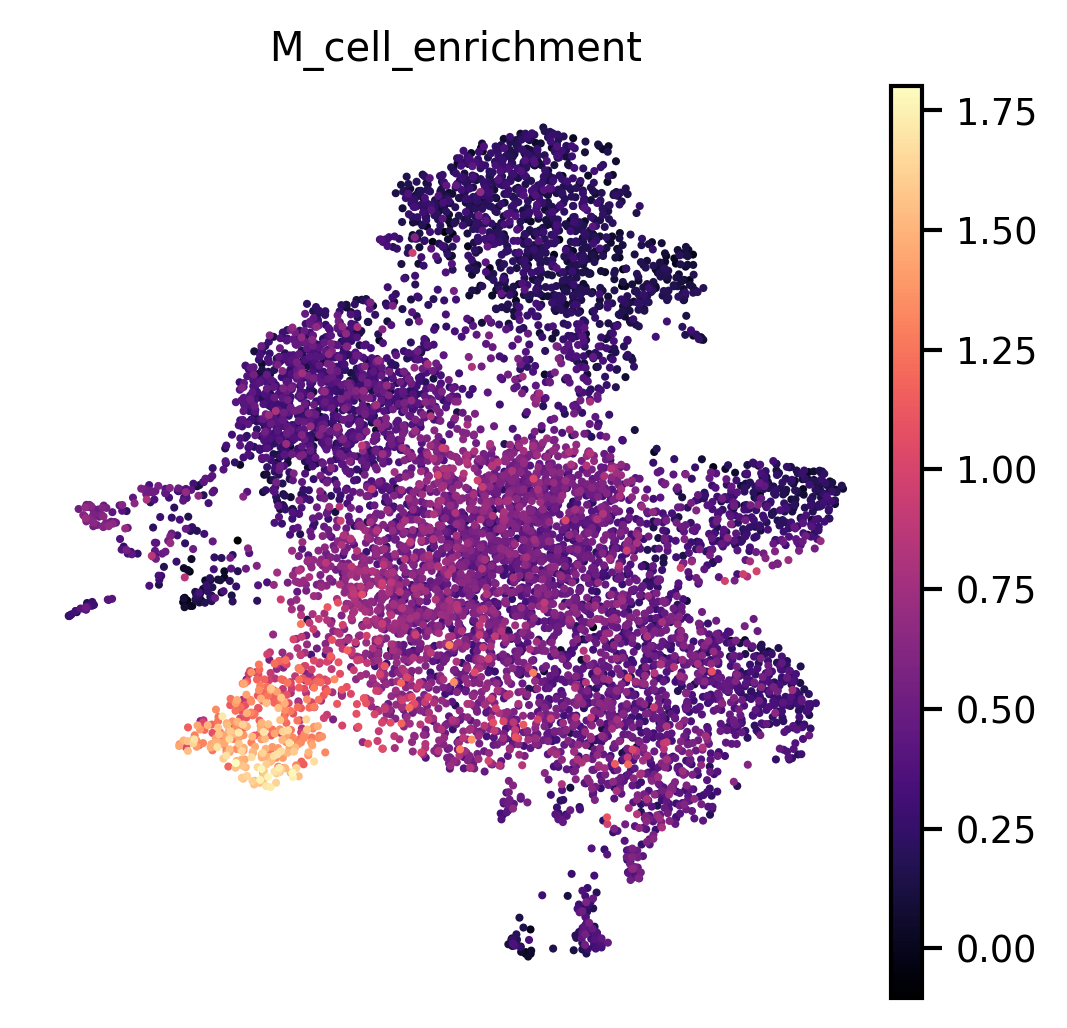

In [13]:
sc.pl.umap(
    adata,
    color="M_cell_enrichment",
    cmap="magma",
)

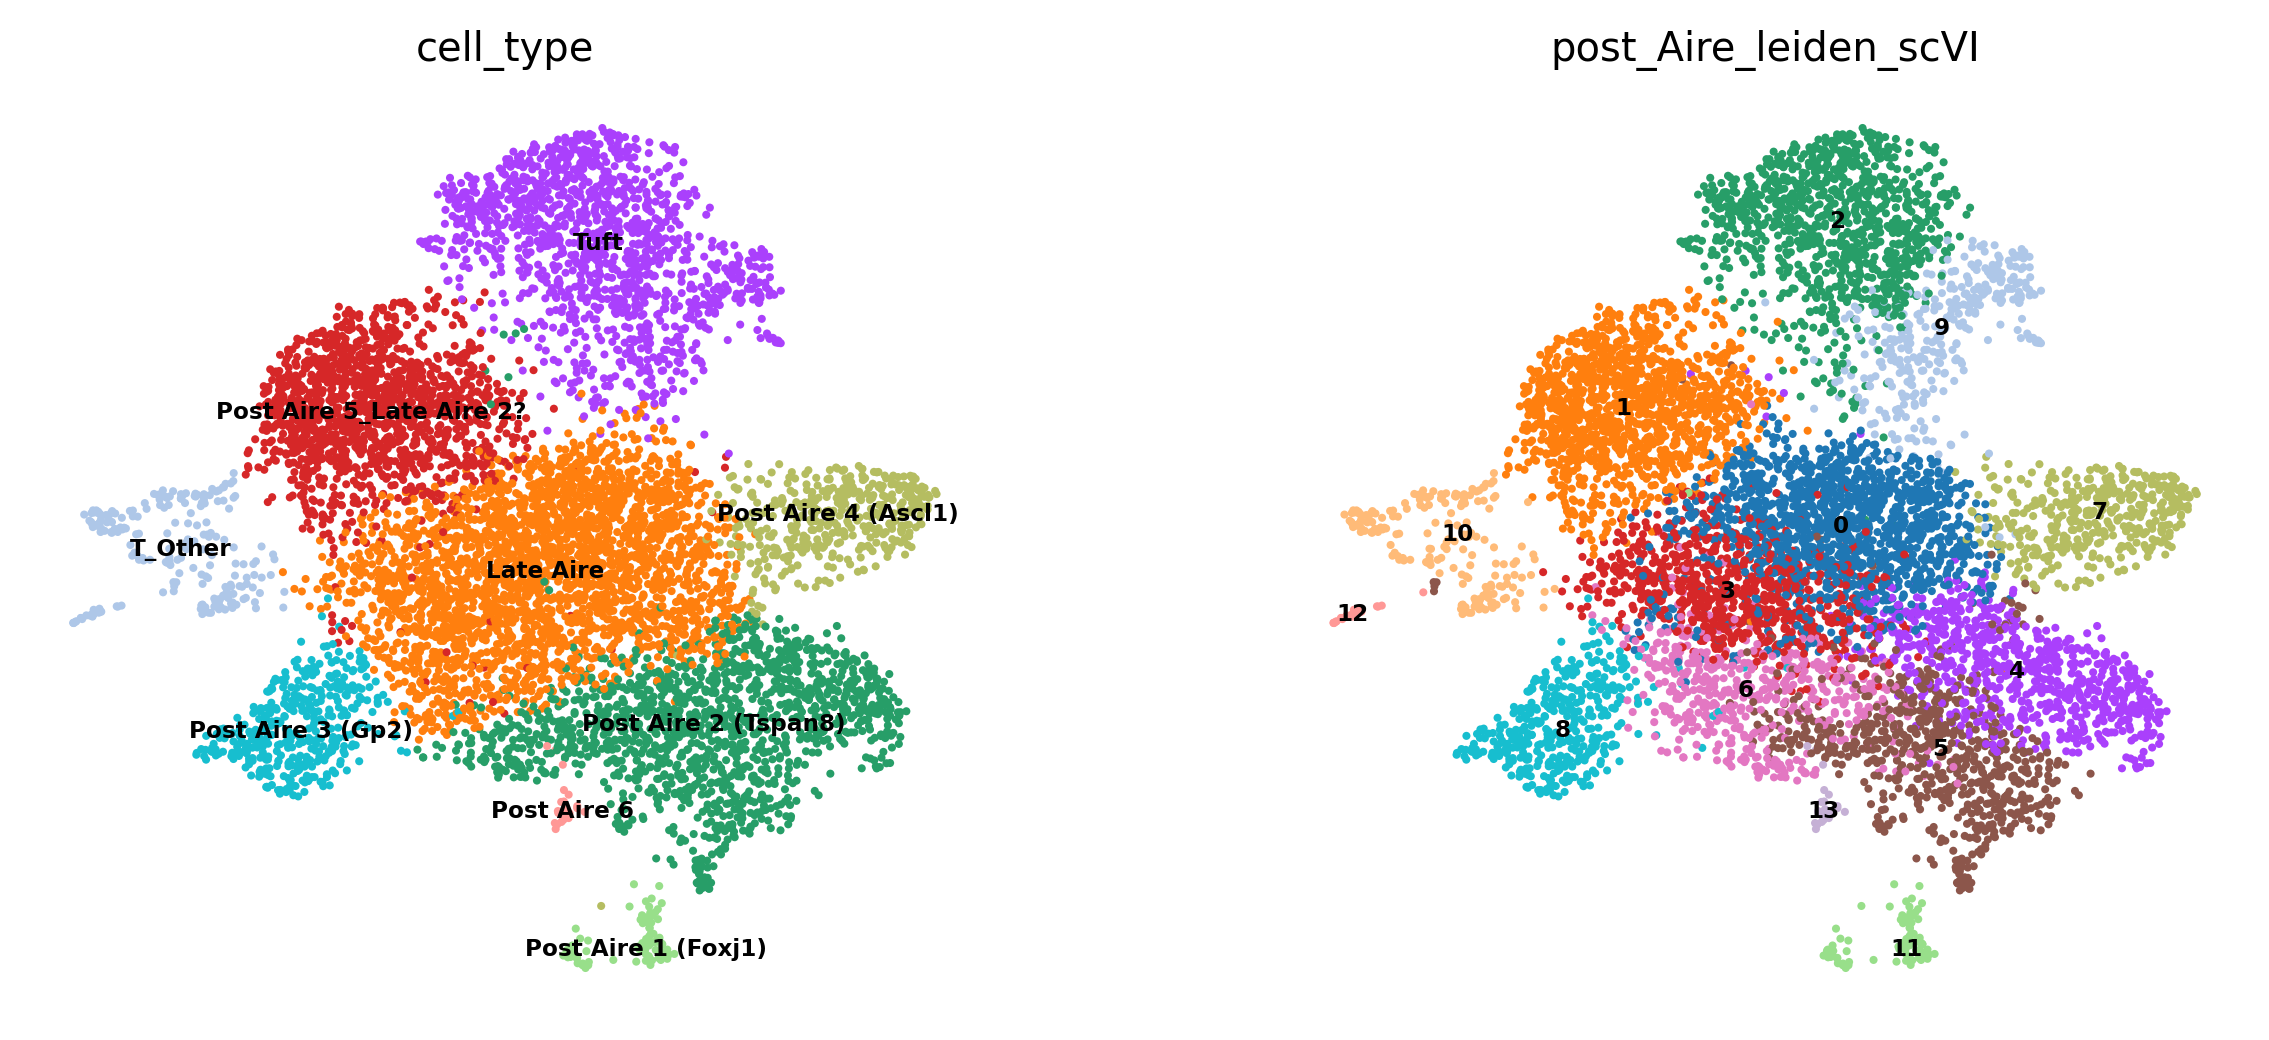

In [99]:
sc.pl.umap(
    adata,
    color=["cell_type", "post_Aire_leiden_scVI"],
    legend_loc="on data",
    legend_fontsize="xx-small",
)

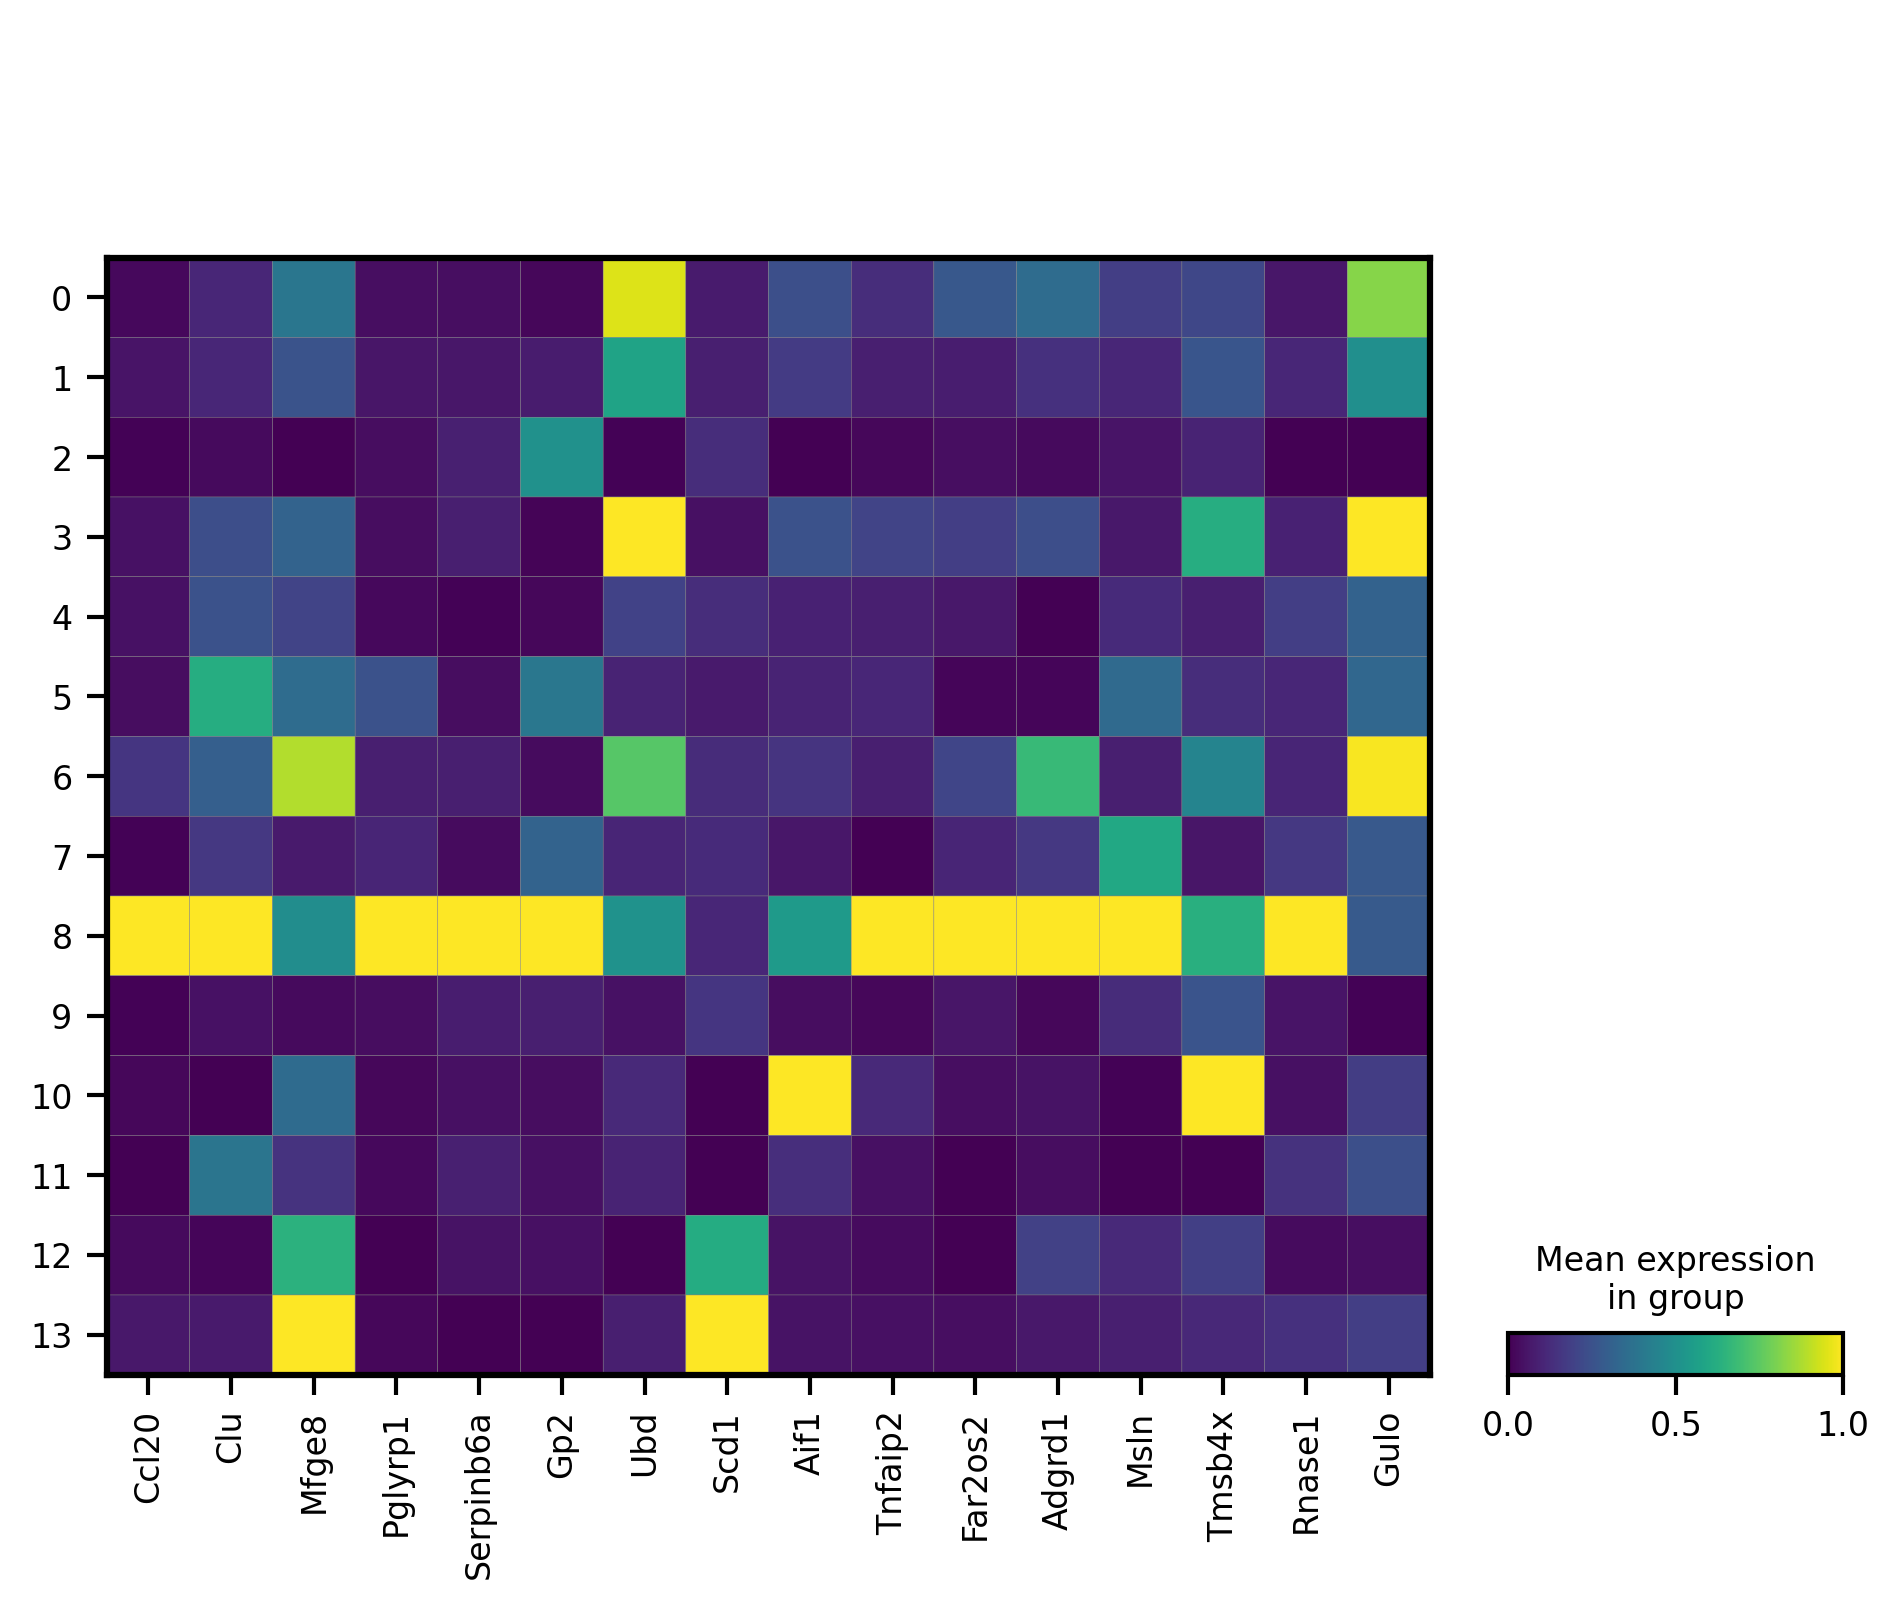

In [34]:
sc.pl.matrixplot(
    adata,
    var_names=[i for i in McellGenes if i in adata.var_names],
    groupby="post_Aire_leiden_scVI",
    standard_scale="var",
    use_raw=False,
    layer="scVI_normalized"
)

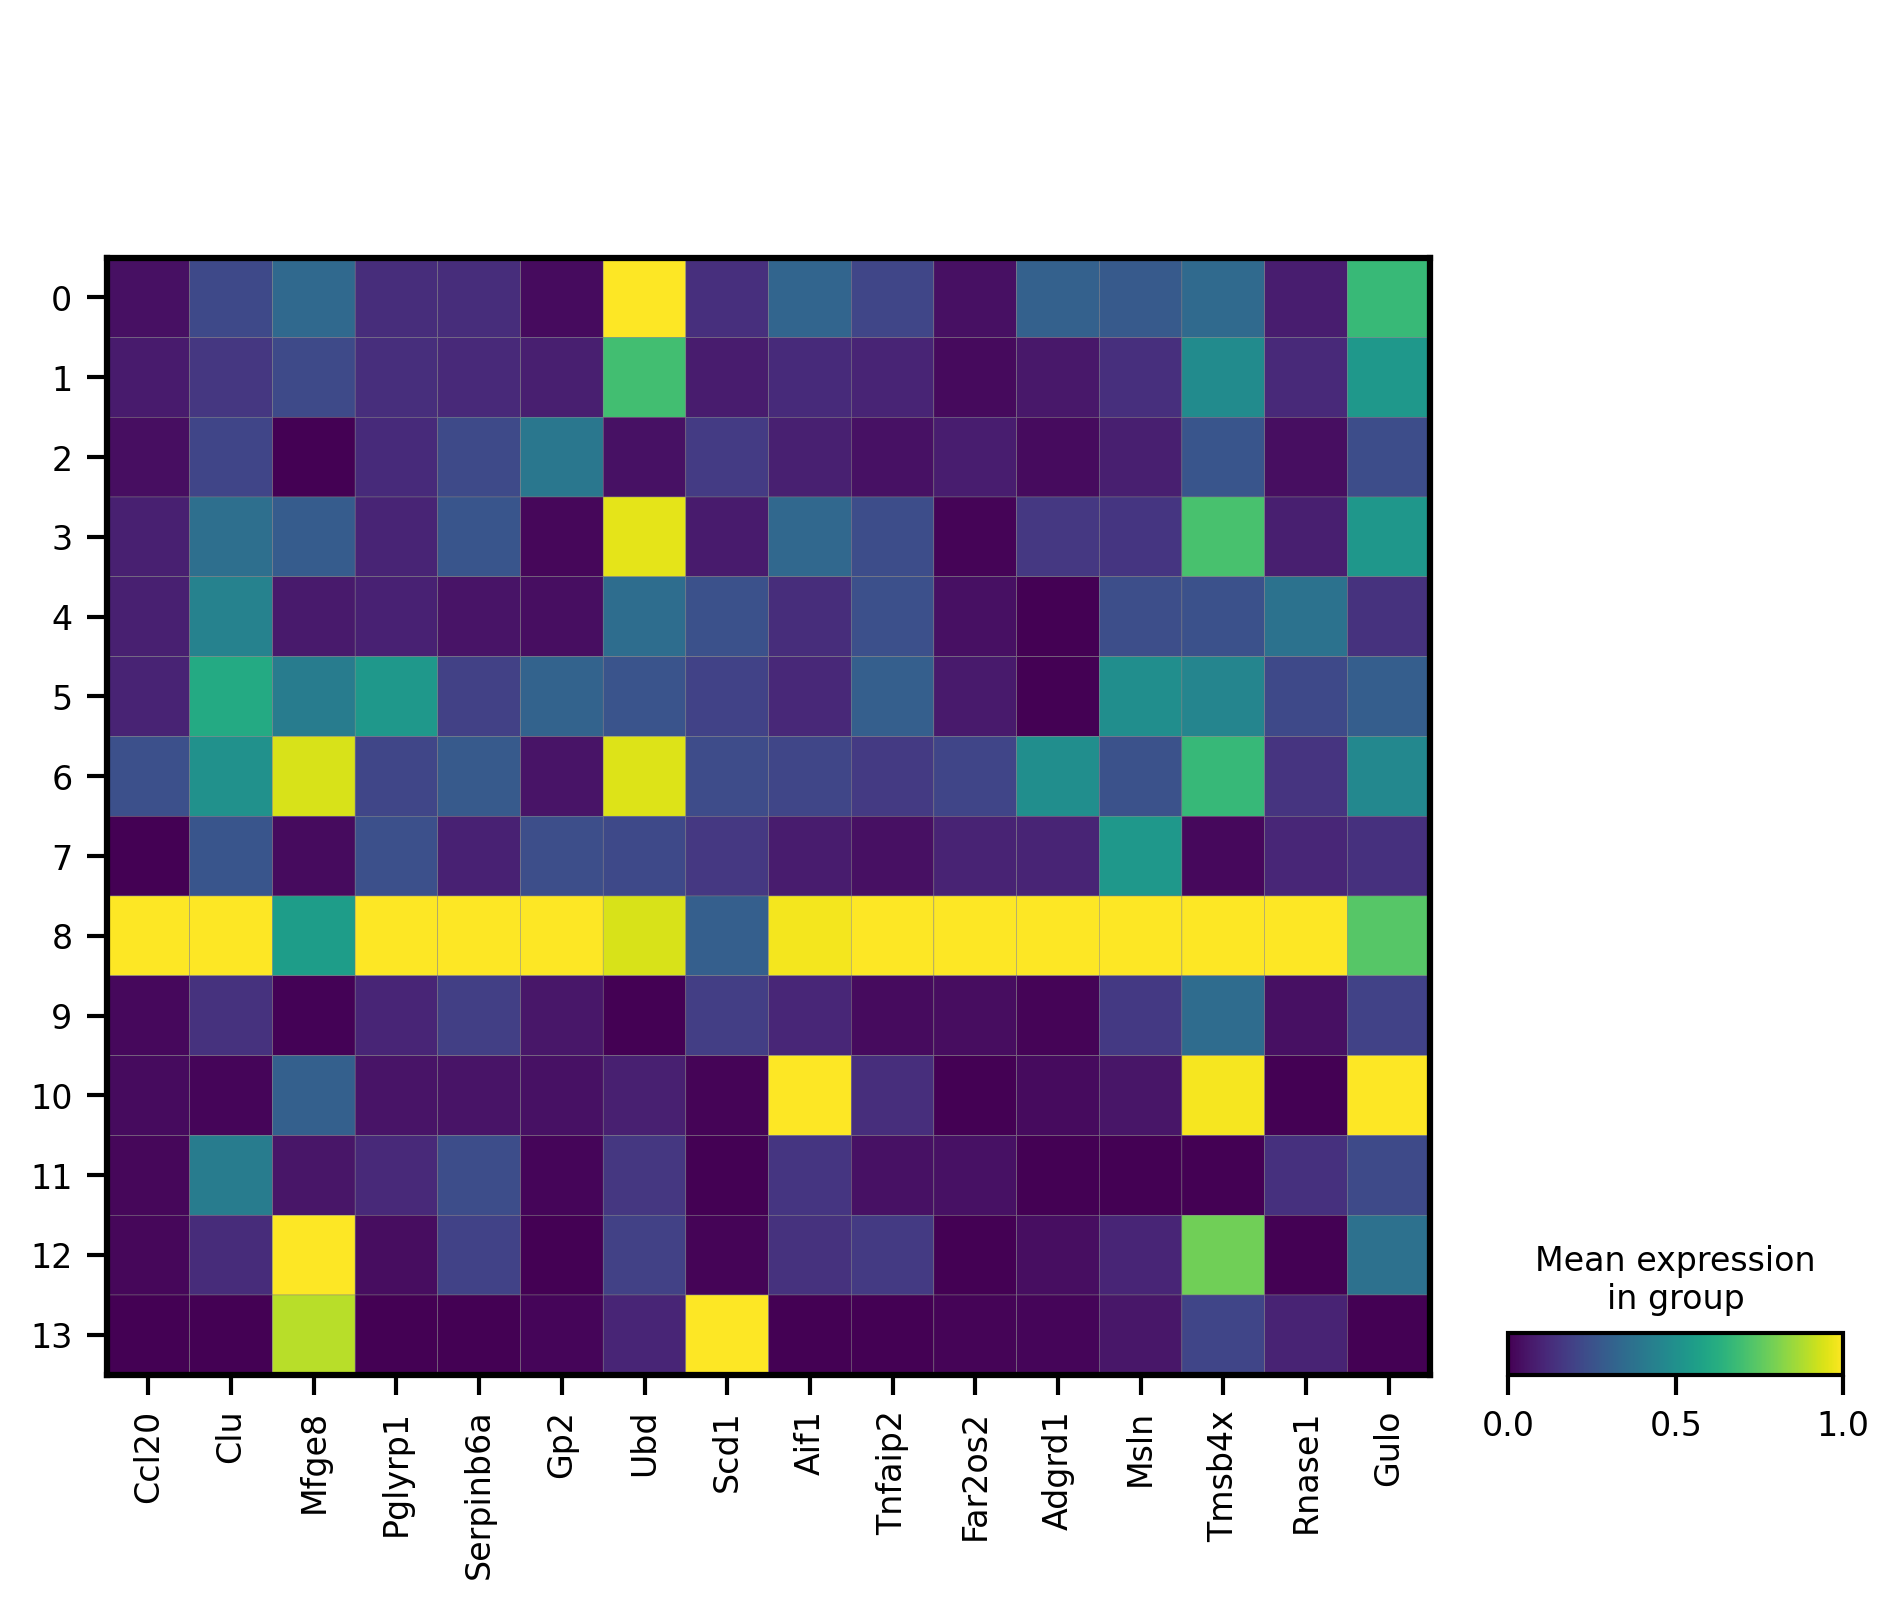

In [42]:
sc.pl.matrixplot(
    adata,
    var_names=[i for i in McellGenes if i in adata.var_names],
    groupby="post_Aire_leiden_scVI",
    standard_scale="var",
    use_raw=False,
)

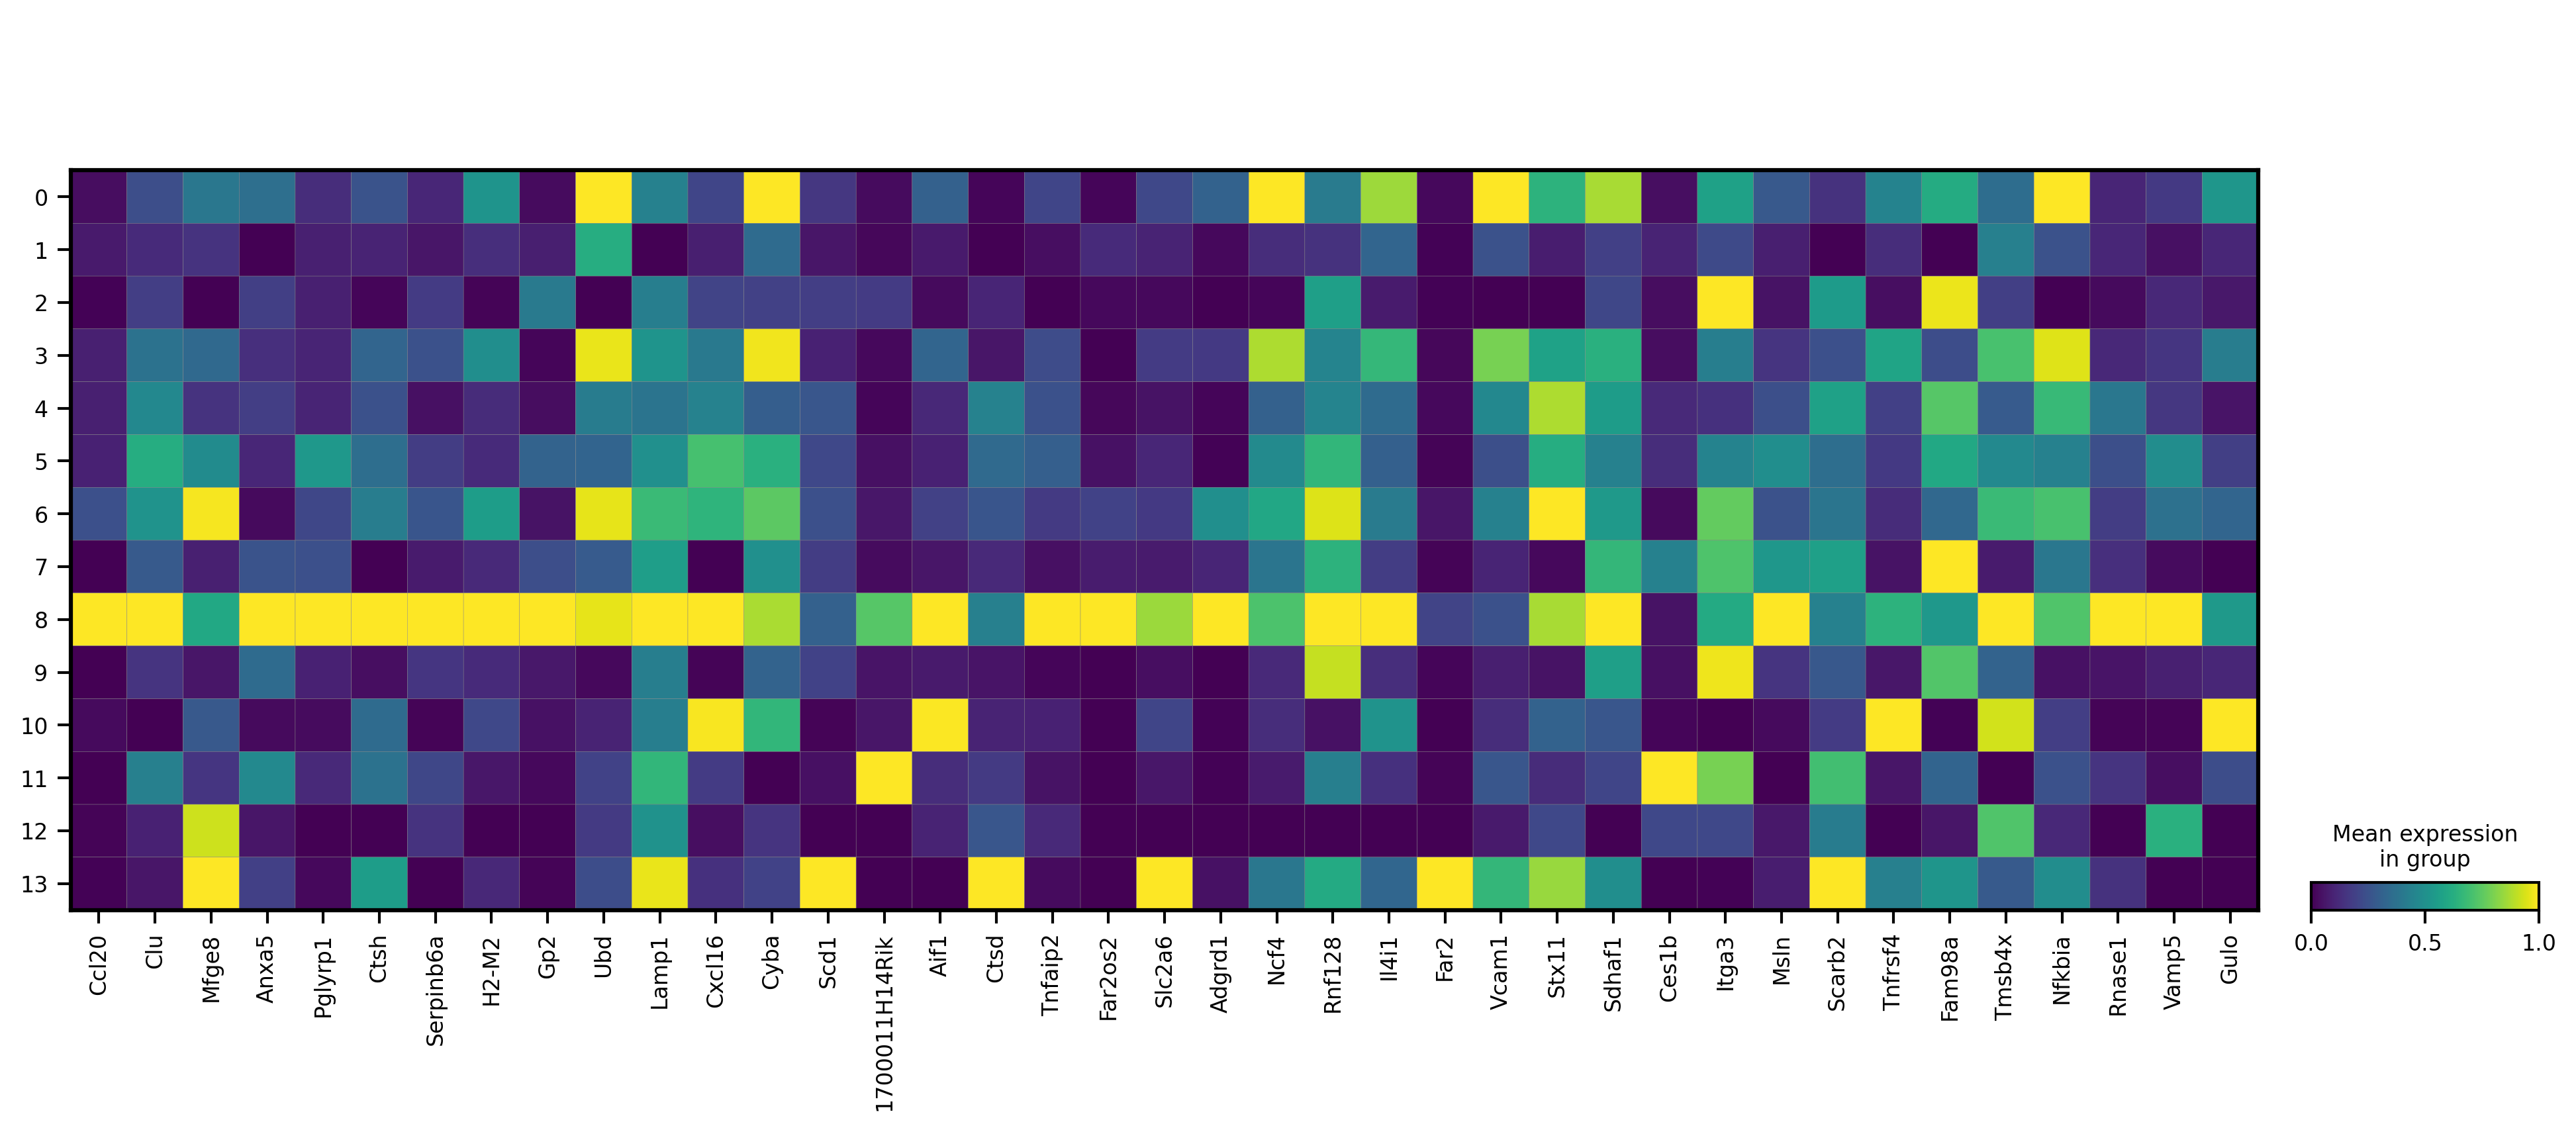

In [36]:
sc.pl.matrixplot(
    adata,
    var_names=[i for i in McellGenes if i in adata.raw.var_names],
    groupby="post_Aire_leiden_scVI",
    standard_scale="var",
)

## DE comparison

In [74]:
McellDE = pd.read_csv("/notebook/Joe/M-cells/analysis/DE_post_aire_cell_types/Post Aire 3 (Gp2)_marker_genes.csv", index_col=0)

In [75]:
McellDE["rank"] = [i for i in range(1,len(McellDE)+1)]
McellDE

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2,rank
Ccl9,0.9956,0.0044,5.421739,0.008863,0.000572,0.0,0.25,4.743963,4.639649,1.964097,...,0.633830,0.941026,0.142216,86.370514,4.195686,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,1
Serpinb6a,0.9954,0.0046,5.377086,0.029896,0.002171,0.0,0.25,3.732139,3.724591,1.512256,...,2.480670,0.974359,0.607949,409.240800,24.143080,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,2
Ccl6,0.9942,0.0058,5.144079,0.010858,0.000465,0.0,0.25,5.308815,5.304917,2.179527,...,0.377527,0.810256,0.072891,109.493020,2.443111,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,3
Ccl20,0.9922,0.0078,4.845800,0.031704,0.001446,0.0,0.25,5.093162,5.151972,2.270633,...,2.364992,0.925641,0.220916,403.738200,14.672102,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,4
Umod,0.9902,0.0098,4.615524,0.001633,0.000068,0.0,0.25,5.856925,5.647933,3.343799,...,0.039614,0.102564,0.008319,5.961444,0.269543,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upp1,0.9270,0.0730,2.541494,0.000763,0.000438,0.0,0.25,1.453167,1.462889,2.111221,...,0.320614,0.371795,0.129407,6.249494,3.400924,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,101
Serpina7,0.9268,0.0732,2.538542,0.001025,0.000924,0.0,0.25,0.926595,0.896707,2.406026,...,1.283109,0.133333,0.143932,3.334931,6.955696,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,102
G0s2,0.9256,0.0744,2.520986,0.000404,0.000234,0.0,0.25,1.104667,1.003283,2.661737,...,0.056781,0.164103,0.021260,2.199802,0.526512,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,103
Ttn,0.9256,0.0744,2.520986,0.002040,0.001435,0.0,0.25,0.352576,0.311392,2.353540,...,0.767460,0.379487,0.206391,20.403880,13.073833,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,104


In [76]:
mCellGenesInData = [i for i in McellGenes if i in adata.var_names]

In [78]:
len(mCellGenesInData)

16

In [80]:
McellDE[McellDE.index.isin(mCellGenesInData)]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2,rank
Serpinb6a,0.9954,0.0046,5.377086,0.029896,0.002171,0.0,0.25,3.732139,3.724591,1.512256,...,2.480670,0.974359,0.607949,409.240800,24.143080,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,2
Ccl20,0.9922,0.0078,4.845800,0.031704,0.001446,0.0,0.25,5.093162,5.151972,2.270633,...,2.364992,0.925641,0.220916,403.738200,14.672102,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,4
Tnfaip2,0.9818,0.0182,3.987965,0.011657,0.001629,0.0,0.25,2.970184,2.960323,1.471079,...,1.961441,0.894872,0.403935,129.837780,15.304517,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,11
Pglyrp1,0.9772,0.0228,3.757930,0.022671,0.002086,0.0,0.25,3.304223,3.411449,1.995192,...,3.269408,0.923077,0.442361,242.540450,20.306858,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,17
Rnase1,0.9726,0.0274,3.569430,0.005907,0.000665,0.0,0.25,3.318665,3.270225,1.992994,...,0.796908,0.584615,0.164268,54.194588,5.333861,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,21
Gp2,0.9698,0.0302,3.469248,0.009143,0.001556,0.0,0.25,3.525766,3.664419,2.673796,...,2.544052,0.666667,0.185131,143.718860,21.450111,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,28
Msln,0.9604,0.0396,3.188521,0.005710,0.001207,0.0,0.25,2.397899,2.450791,1.774773,...,1.571240,0.817949,0.343061,63.454765,12.194770,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,41
Adgrd1,0.9576,0.0424,3.117282,0.002594,0.000549,0.0,0.25,2.389439,2.453612,2.615938,...,0.533080,0.620513,0.158986,30.888935,4.368835,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,43
Clu,0.9568,0.0432,3.097754,0.020495,0.006351,0.0,0.25,1.883517,1.943853,1.104038,...,10.144263,0.971795,0.704476,233.471400,70.937340,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,47
Aif1,0.9412,0.0588,2.773014,0.001034,0.000345,0.0,0.25,2.178262,2.029342,1.703618,...,0.248384,0.479487,0.123069,8.184814,2.412584,True,Post Aire 3 (Gp2) vs Rest,Post Aire 3 (Gp2),Rest,70


In [100]:
top30DE = McellDE.index[0:30]

In [101]:
top30DE

Index(['Ccl9', 'Serpinb6a', 'Ccl6', 'Ccl20', 'Umod', 'Gm36945', 'Gm5930',
       'Fabp1', 'Serpinb1a', 'Tnfrsf11b', 'Tnfaip2', 'Abca13', 'Dmbt1', 'Cr2',
       'Gm37800', '1700016F12Rik', 'Pglyrp1', 'Sox8', 'Clca4b', 'Prg2',
       'Rnase1', 'Hamp', 'Siglecf', 'Krt20', 'Btbd16', 'Car6', '1110046J04Rik',
       'Gp2', 'Il1b', 'Gucy1b2'],
      dtype='object')

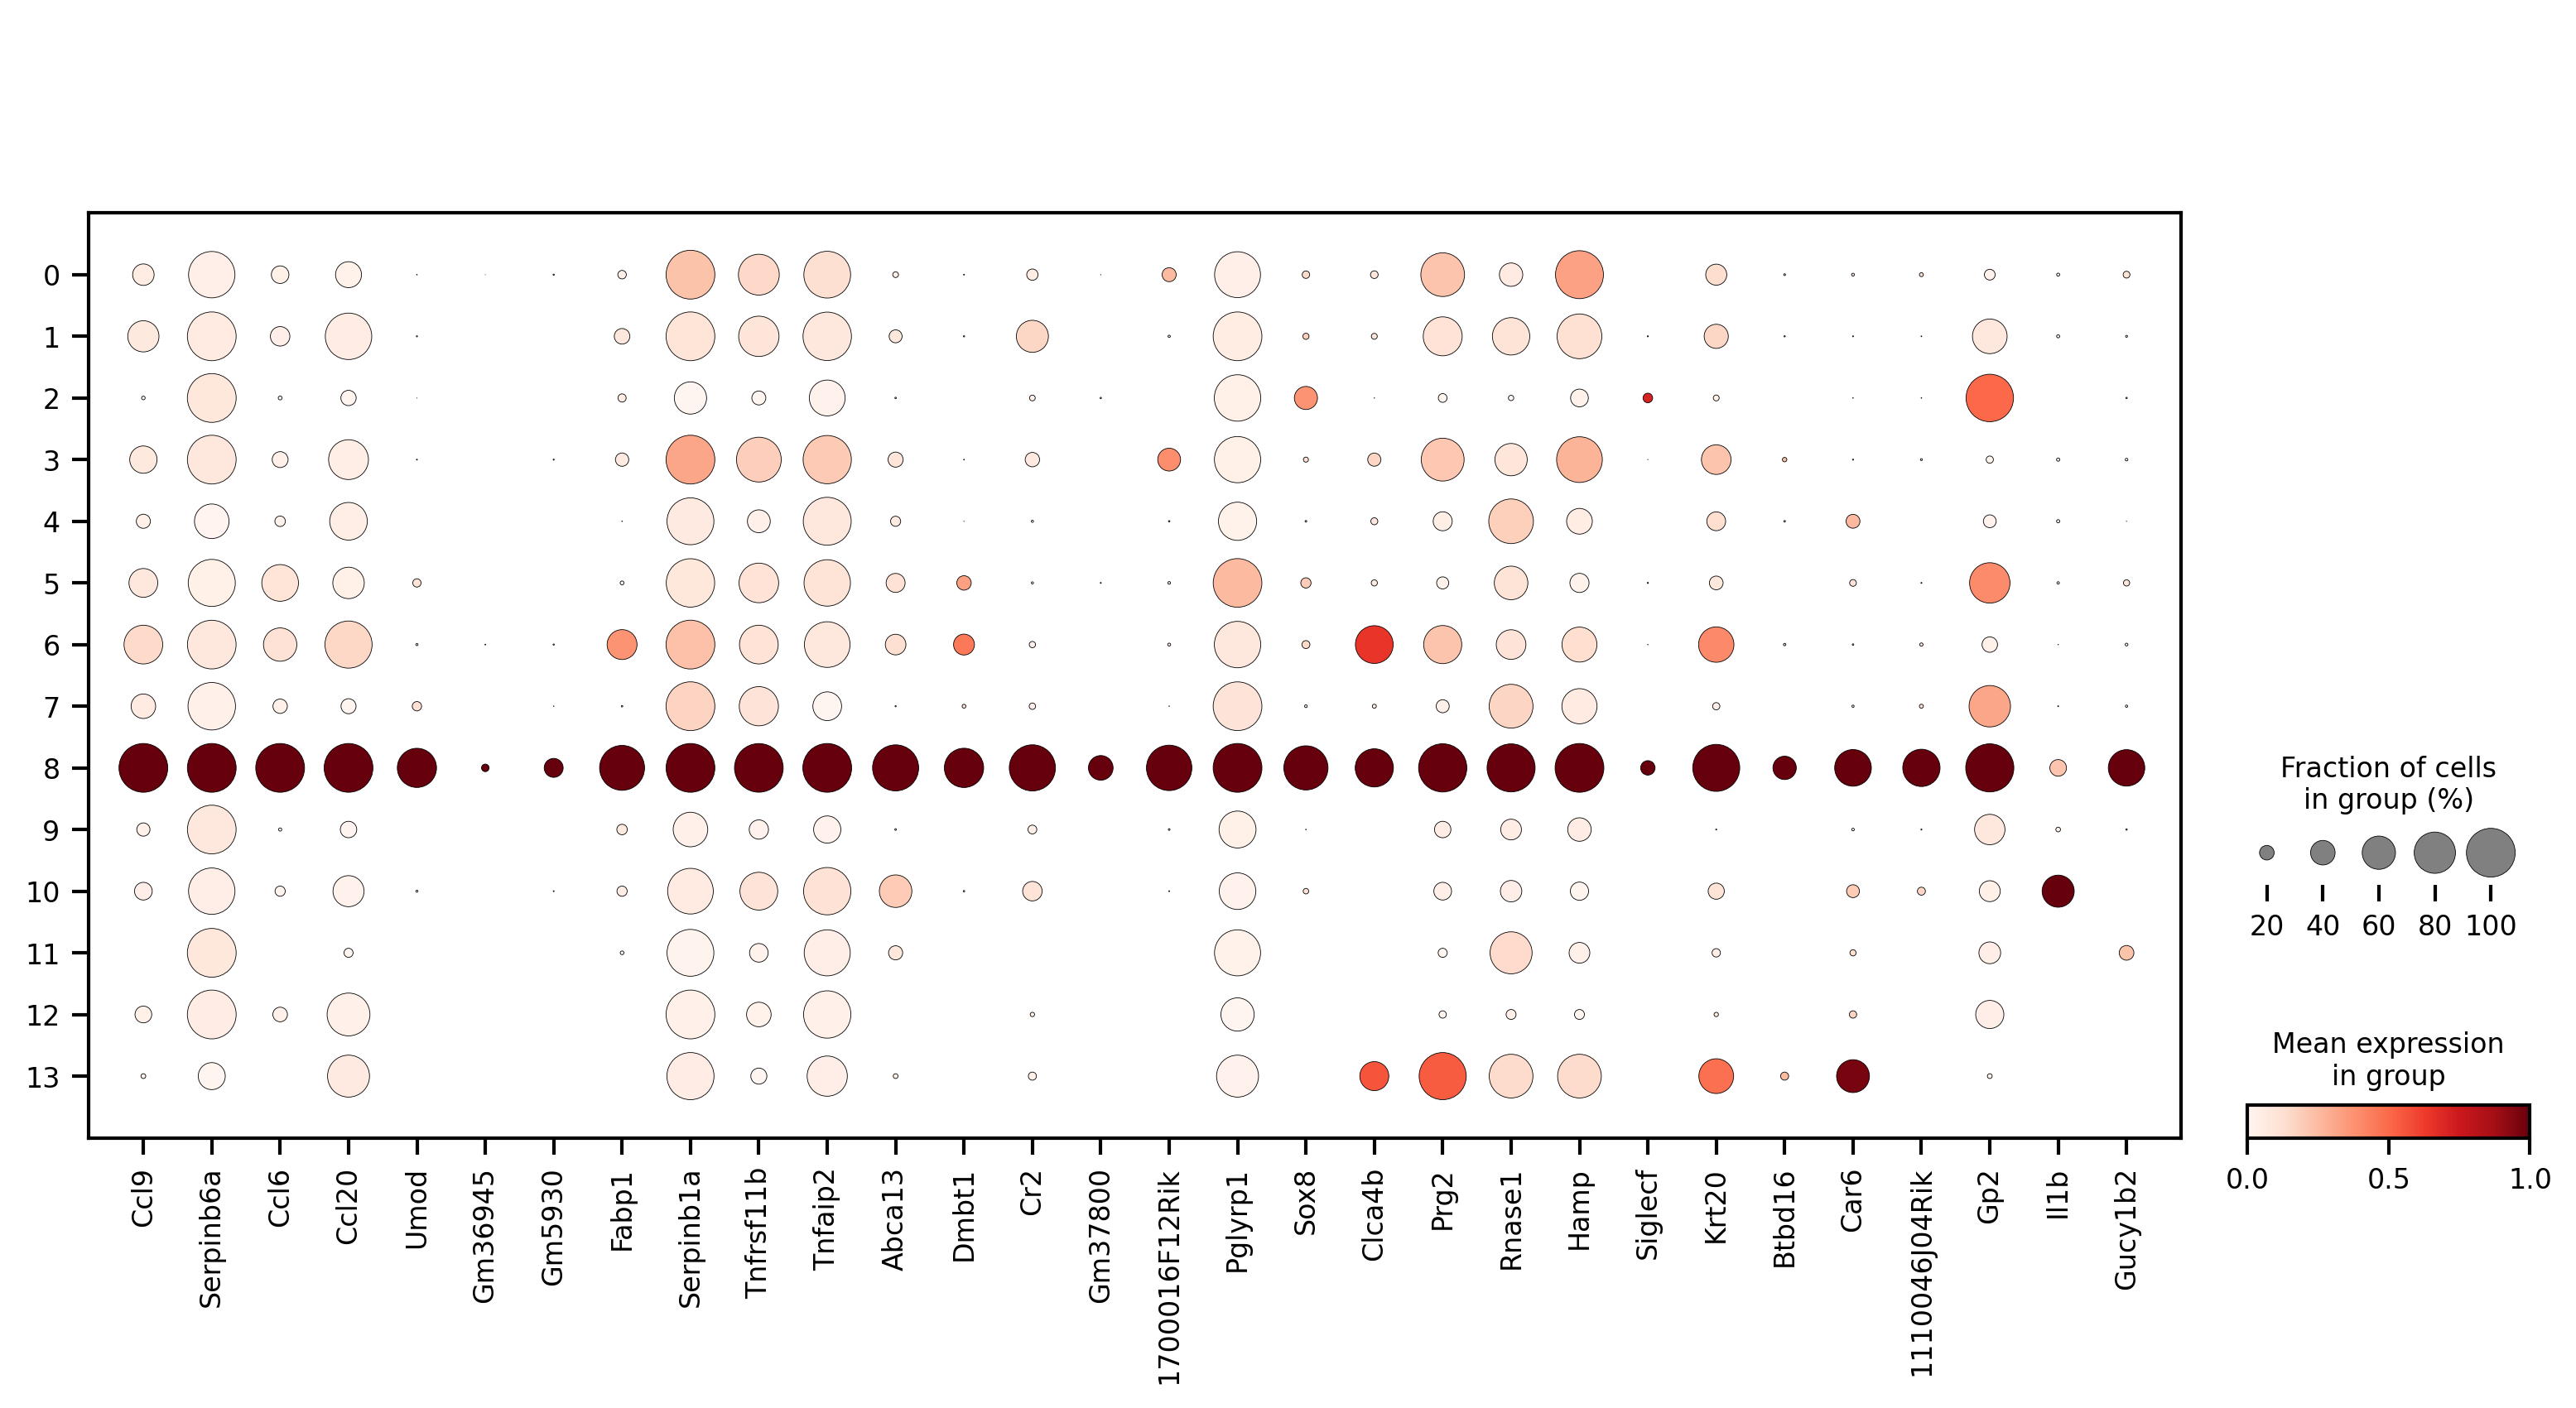

In [102]:
sc.pl.dotplot(
    adata,
    var_names=top30DE,
    groupby="post_Aire_leiden_scVI",
    standard_scale="var",
    use_raw=False,
    layer="scVI_normalized",
    expression_cutoff=5,
)